In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# pd.set_option('display.max_rows', None)
df = pd.read_csv('./stats-redirect.csv')

In [2]:
df

,port,duration,pkt_size,rate,mbps,mpps,loss
0,0,60,64,1.0,179.4048,0.3738,0.0000
1,1,60,64,1.0,179.4043,0.3738,0.0000
2,2,60,64,1.0,179.4052,0.3738,0.0000
3,3,60,64,1.0,179.4047,0.3738,0.0000
4,0,60,64,2.0,352.7225,0.7348,0.0083
...,...,...,...,...,...,...,...
727,3,60,1024,83.0,1193.8312,2.4871,0.1042
728,0,60,1024,84.0,535.3361,1.1153,55.7842
729,1,60,1024,84.0,562.9965,1.1729,53.4997
730,2,60,1024,84.0,1207.6437,2.5159,0.1115


In [3]:
df.columns = df.columns.str.replace(' ','')
df = df.drop(['duration','rate','mbps'], axis=1)
df = df.sort_values(by=['pkt_size','port'],ignore_index=True)

In [4]:
def transfrm(x):
    if (x == 0 or x == 1):
        return 'ARM'
    else:
        return 'Intel'

In [5]:
df['port'] = df['port'].apply(transfrm)
df

,port,pkt_size,mpps,loss
0,ARM,64,0.3738,0.0000
1,ARM,64,0.7348,0.0083
2,ARM,64,1.1060,1.3354
3,ARM,64,1.1826,20.8417
4,ARM,64,1.0834,40.9852
...,...,...,...,...
727,Intel,1024,2.3985,0.0893
728,Intel,1024,2.4268,0.1090
729,Intel,1024,2.4161,0.0764
730,Intel,1024,2.4871,0.1042


In [6]:
is_low_loss = df['loss']<=0.1
df_low_loss = df[is_low_loss]
df_low_loss

,port,pkt_size,mpps,loss
0,ARM,64,0.3738,0.0000
1,ARM,64,0.7348,0.0083
9,ARM,64,0.3738,0.0000
10,ARM,64,0.7348,0.0084
18,Intel,64,0.3738,0.0000
...,...,...,...,...
724,Intel,1024,2.3093,0.0840
725,Intel,1024,2.3389,0.0639
726,Intel,1024,2.3289,0.0861
727,Intel,1024,2.3985,0.0893


In [7]:
df_low_loss.groupby(['port','pkt_size']).mean()
df_low_loss

,port,pkt_size,mpps,loss
0,ARM,64,0.3738,0.0000
1,ARM,64,0.7348,0.0083
9,ARM,64,0.3738,0.0000
10,ARM,64,0.7348,0.0084
18,Intel,64,0.3738,0.0000
...,...,...,...,...
724,Intel,1024,2.3093,0.0840
725,Intel,1024,2.3389,0.0639
726,Intel,1024,2.3289,0.0861
727,Intel,1024,2.3985,0.0893


In [8]:
df_low_loss = df_low_loss.drop(['loss'], axis=1)
pd.set_option('display.max_rows', None)
df_low_loss

,port,pkt_size,mpps
0,ARM,64,0.3738
1,ARM,64,0.7348
9,ARM,64,0.3738
10,ARM,64,0.7348
18,Intel,64,0.3738
19,Intel,64,0.7350
20,Intel,64,1.1212
21,Intel,64,1.4930
22,Intel,64,1.8365
23,Intel,64,2.2384


In [9]:
perf = df_low_loss.pivot_table(index='pkt_size',values='mpps', columns='port',aggfunc= 'max')
perf

port,ARM,Intel
pkt_size,,
64,0.7348,2.9255
128,0.8483,3.3171
256,1.0226,3.2231
512,1.0021,2.4706
1024,0.8414,2.4876


<Figure size 480x360 with 0 Axes>

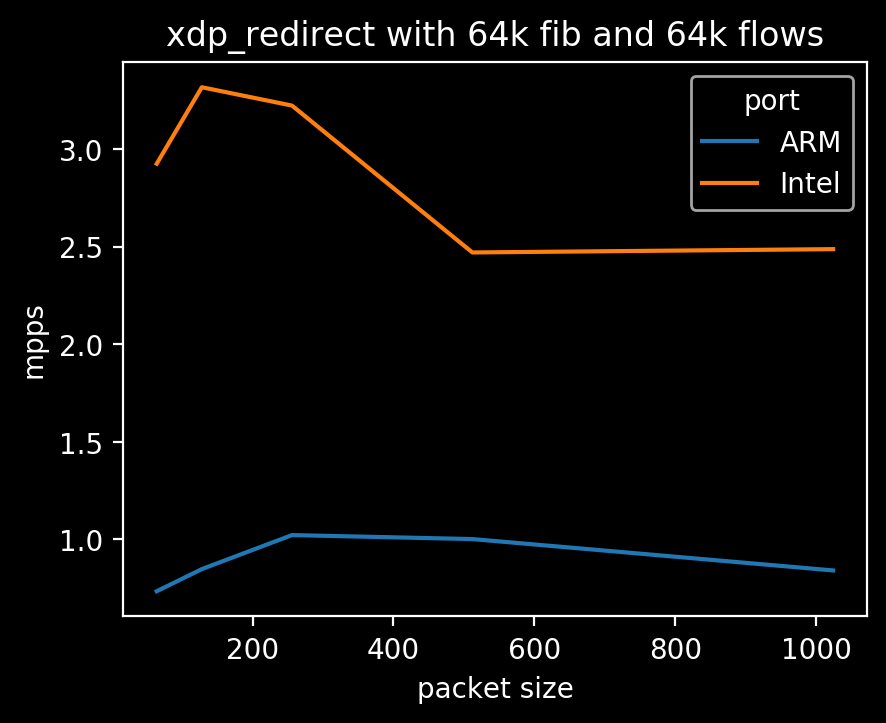

In [10]:
f = plt.figure()
ax = perf.plot(title='xdp_redirect with 64k fib and 64k flows')
ax.set_xlabel('packet size')
ax.set_ylabel('mpps')
plt.show()

In [11]:
perf

port,ARM,Intel
pkt_size,,
64,0.7348,2.9255
128,0.8483,3.3171
256,1.0226,3.2231
512,1.0021,2.4706
1024,0.8414,2.4876


In [12]:
mpps_per_watt = perf
mpps_per_watt['ARM'] = mpps_per_watt['ARM'].div(1.6876)
mpps_per_watt['Intel'] = mpps_per_watt['Intel'].div(6.875)
mpps_per_watt

port,ARM,Intel
pkt_size,,
64,0.435411,0.425527
128,0.502667,0.482487
256,0.605949,0.468815
512,0.593802,0.359360
1024,0.498578,0.361833


<Figure size 480x360 with 0 Axes>

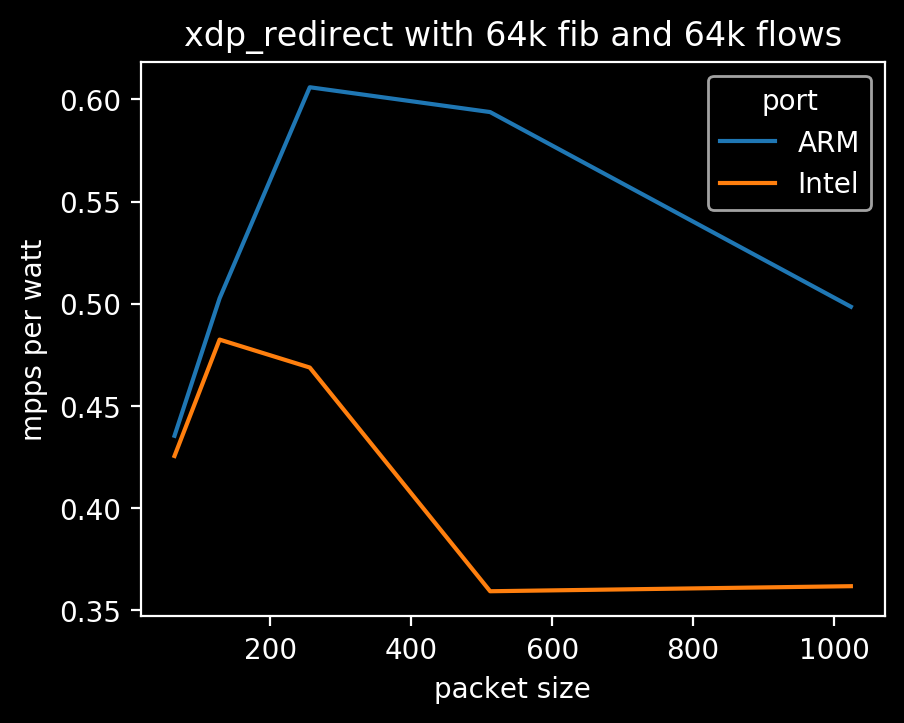

In [13]:
f = plt.figure()
ax = perf.plot(title='xdp_redirect with 64k fib and 64k flows')
ax.set_xlabel('packet size')
ax.set_ylabel('mpps per watt')
plt.show()